# <span style="color:red">Welcome !</span>

## Quantum Computing with QISKit "Hello World!" 

#### <span style="color:blue"><em>Jean-Michel Torres, IBM Q Hub France, July 9th 2019</em></span>

Content under Apache Licence version 2

Star, download, or use from mybinder at: https://github.com/jmit34/20190709

### Content:
<ol>
    <li>Quantum Experience: composer overview</li>
    <li>Python & Jupyter warm-up</li>
    <li>QISKit: single "classical" qubit</li>
    <li>QISKit: multi-"classical"-qubit gates</li>
    <li>Qubits quantum states</li>
    <li>Quantum emoticon</li>
    <li>More about quantum computing</li>
</ol>


# 1. Quantum Experience: composer demo

https://youtu.be/wfsUxdYSOFs

https://www.research.ibm.com/ibm-q/

# 2. Python & Jupyter warm-up

In [ ]:
a = 34

In [ ]:
print(a)

In [11]:
from math import sin, sqrt

a = 2
b = sqrt(a)
print(b)
c = sin(a)
print(c)

1.4142135623730951
0.9092974268256817


## Looping, testing : Monte-Carlo example

In [12]:
import random
import time

start_time = time.time()

#---> calculation starts here
iterations = 5_000_000                              # change this for accuracy vs duration 
hit = 0                                             # counter of random hits with module < 1 
for i in range(iterations):
    if random.random()**2 + random.random()**2 < 1: # random(a,b) returns a pseudo random float between a and b
        hit += 1
#---> calulation ends here

end_time = time.time()
duration = end_time - start_time

print(f"Total execution time: {duration:.1f} seconds")
print(f"Pi = {4 * hit / iterations:.8f}")

Total execution time: 1.7 seconds
Pi = 3.14228880


## Finding the factors of a large integer

In [13]:
import time
from math import sqrt,floor

start_time = time.time()
# choose one (depending on your ratio patience/CPU)
d =         6721502531819 #(~0.4 sec)  (13 digits)
#d =    40355369611024687 #(~30 sec)   (17 digits)
#d = 70552560783426882343 #(~2100 sec) (20 digits)

maxCalc = floor(sqrt(d))

for i in range(2,maxCalc):
    if d % i == 0:
        print(i)
        break

end_time = time.time()
duration = end_time - start_time
print(f"Total execution time: {duration:.1f} seconds")
print(f"Loops per second {i / duration:.0f}")

1453033
Total execution time: 0.2 seconds
Loops per second 8347515


# 3. QISKit: single qubit.

## <span style="color:red"><em>Quantum program structure, single "bit-flip": NOT (aka X-gate)</em></span>

#### imports
We need to import from qiskit : 
<ul>
    <li>QuantumRegister : to define and use qubits</li>
    <li>ClassicalRegister : to get a "classical" measurement of the qubits after computation has happened</li>
    <li>QuantumCircuit to be able to compose your calculation</li>
    <li>execute : this will be used to actually "run" your circuit</li>
</ul>    


In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

#### define needed registers and build quantum circuit
for example let's define `qr` as a quantum register of size 1 (because we will be using only 1 qubit here)

`<register_name> = QuantumRegister(size)` 

and let's define `cr` as a classical register with that same size. Similar notation using ClassicalRegister constructor


In [15]:
# define registers here, size 1
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

Let's define a quantum circuit using `qc` and `cr`

`<circuit> = QuantumCircuit(<quantum_register>, <classical_register>)`


In [16]:
# define quantum  circuit here 
my_circuit = QuantumCircuit(qr,cr)

Then you can add a gate (in this case NOT is the `x` gate: reverse 0 to 1 and 1 to 0, this way: 

`<circuit>.gate(<qubits>)`

where `<circuit>` is the circuit object you have created above, and `<qubits>`is the list of qubit on which the gate applies `qr[0]` in this case.

In [17]:
# add not gate here 
my_circuit.x(qr[0])

Add another gate to your circuit, this one is special : it comes at the end and uses `qr` and `cr`

`<circuit>.measure(<qr,cr>)`    

this will measure the states of the qubits from the quantum register, and load values into the classical register.

In [ ]:
# add measurement gate here 
my_circuit.measure(qr,cr)

You can now visualize the circuit using the .draw() method on your circuit : `<circuit>.draw()`
 

In [ ]:
# use draw method: 
my_circuit.draw(output='mpl')

### prepare for execution

First select on which device (one of the IBM Q machines or simulator we will run our experiment on), this is called the "backend".

Here we select the local simulator. Later in the notebook we show a connection to a real device.

In [7]:
from qiskit import Aer
print(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

[<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>, <PulseSimulator('pulse_simulator') from AerProvider()>]


### execute, and read results

Now we execute our experiment using the `execute` function, returning a "job result" object:

`execute()` uses these parameters: 
<ul>
    <li>circuit object, that we have build</li>
    <li>the device on which we execute (in our example this is stored in "backend")</li>
    <li>the number of "shots" we want to run, eg: "shots=1024" (from 1 to 8192)</li>
</ul>  

The syntax is: 

`<myjob> = execute(<my_circuit>,<backend>,shots=nnnn)` 

Then we store the result in a variable `<my_result>` using `.result()` method on the job

Finally, we can print `<my_result>.get_counts(<my_circuit>)`


In [10]:
# define job, get results
job = execute(my_circuit,backend,shots=1024)
my_result = job.result()
print(my_result.get_counts(my_circuit))  

NameError: name 'my_circuit' is not defined

In [9]:
# plot results
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_result.get_counts(my_circuit))

NameError: name 'my_result' is not defined

# 3. QISKit: multi-qbit gates

## <span style="color:red"><em>3.1 CNOT controlled not </em></span>

### flips state of qbit B if qbit A is 1 (else leave B in original state).
<img src="./images/CNOT.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

The CNOT gate syntax is : `.cx(<control_qubit,target_qubit)`

Don't forget to define quantum and classical registers with size 2. 
The build a quantum circuit. You can use `x` gate on qbit0 to experiment the cnot effect. 

In [ ]:
# define registers, size 2


In [ ]:
# define circuit using the registers you just created


# add x on qubit0 (or not): try with one or two combinations


# add cnot control bit qbit0, target qubit1

# add .measure()

# add .draw(output='mpl')


In [ ]:
# execute, get results 
job = execute(circ,backend, shots=1024)
result = job.result()
result.get_counts(circ)

In [ ]:
plot_histogram(result.get_counts(circ))

## <span style="color:red"><em>3.3 CONTROL-SWAP : Fredkin gate</em></span>


### if A == 1 then swap B and C states.
<img src="./images/Fredkin.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left">


control-swap syntax: 

`<circuit>.cswap(control_qubit, swapped_qubit, swapped_qubit)`

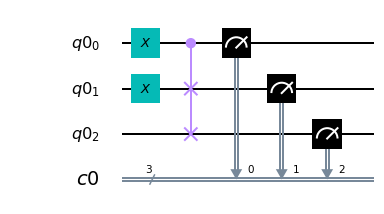

In [3]:
# define registers, circuit, add X on qubit 0, and/or 1, and/or 2 to view differentt cases: 
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc_cswap = QuantumCircuit(qr,cr)
qc_cswap.x(qr[0])
qc_cswap.x(qr[1])

#add cswap

qc_cswap.cswap(qr[0],qr[1],qr[2])

#add measure and draw

qc_cswap.measure(qr,cr)
qc_cswap.draw(output='mpl')

In [8]:
# execute, get results, plot...

job = execute(qc_cswap,backend, shots=1024)
result = job.result()
result.get_counts(qc_cswap)
plot_histogram(result.get_counts(qc_cswap))

NameError: name 'plot_histogram' is not defined

## <span style="color:red"><em>3.3 CONTROL-CONTROL-NOT Toffoli gate</em></span>

### if A == 1 and B == 1, then flip C
<img src="./images/Toffoli.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">
Notes:
<ol>
    <li><span style="color:green"><em>Toffoli gate is universal</em></span></li>
    <li><span style="color:green"><em>Quantum gates are reversible.</em></span></li>
</ol>
control-control-not syntax : 

`<circuit>.ccx(control_qubitA, control_qubitB, taget_qubit)`

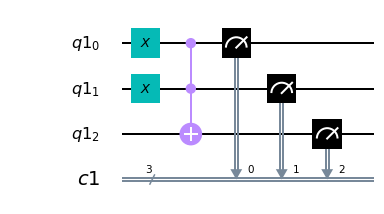

In [5]:
# define registers, size 3
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
# define quantum circuit

qc_ccnot = QuantumCircuit(qr,cr)

# add x on qubit0 and/or qubit 1 to view different results 
qc_ccnot.x(qr[0])
qc_ccnot.x(qr[1])

# add ccnot, measure, draw 
qc_ccnot.ccx(qr[0],qr[1],qr[2])
qc_ccnot.measure(qr,cr)
qc_ccnot.draw(output='mpl')

In [6]:
# execute, get results, plot
job = execute(qc_ccnot,backend, shots=1024)
result = job.result()
result.get_counts(qc_ccnot)
plot_histogram(result.get_counts(qc_ccnot))

NameError: name 'backend' is not defined

## <span style="color:red"><em>3.4 What does this do ?</em></span>

This is a basic 2 qubits gate, can you figure out what this does ? 

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
mystery = QuantumCircuit(qr,cr)
###########################
mystery.cx(qr[0],qr[1])
mystery.cx(qr[1],qr[0])
mystery.cx(qr[0],qr[1])
mystery.measure(qr,cr)
###########################
mystery.draw(output='mpl')

.... Hint, try this (will run the above circuit against all input combinations 00,01,10,11 and will show you the result): 

In [ ]:
print("       q0 q1")
print("       -- --")
for i in range(4): 
    qc = QuantumCircuit(qr,cr)
    if i%2: 
        qc.x(qr[0])
    if i>1:
        qc.x(qr[1])
        
    # this is the same circuit as above #
    qc.cx(qr[0],qr[1])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[0],qr[1])
    qc.measure(qr,cr)
    #####################################
    print(f"input:  {(i>1)*1} {i%2}")
    job = execute(qc,backend, shots=1024)
    result = job.result()
    for x in (result.get_counts(qc)):
        print(f"output: {x[0]} {x[1]}")
    print(" ")

## <span style="color:red"><em>3.5 Try it yourself: </em></span>


Build and execute a QuantumCircuit for a single bit adder (with carry)

#### design it yourself or execute the following cell to display a clue ! (clue.png)

In [ ]:
from IPython.display import Image, display
print("This is an implementation of the full 2 bit adder:")
filename = './images/clue.png'
display(Image(filename=filename, width=600))

In [ ]:
#write the quantum adder here

# 4. Qubits quantum states

##  <span style="color:red"><em>4.1 Single qbit : quantum state</em></span>

In [ ]:
from math import pi,cos,sin,sqrt
print(sqrt(cos(pi/4)))
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circ = QuantumCircuit(qr,cr)
circ.u3(pi/4,0,0,qr[0])
circ.measure(qr,cr)
circ.draw(output='mpl')

In [ ]:
job = execute(circ,backend, shots=8192)
result = job.result()
result.get_counts(circ)
plot_histogram(result.get_counts(circ))

##  <span style="color:red"><em>4.2 Single qbit : "superpositon"</em></span>

Let's do it again : define registers (size 1), quantum circuit, add `h` gate, and `measure` gate, draw circuit. 

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw(output='mpl')

execute and get results

In [ ]:
job = execute(qc_sup,backend, shots=1)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

<img src="./images/h_bloch2.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="left">

### See this page for more on what happens on the "Bloch Sphere" when using this and other quantum gates : https://javafxpert.github.io/grok-bloch/

#### More on moving in the Bloch-Sphere ?

##  <span style="color:red"><em>4.3 What is superposition exactly ?</em></span>

Now try to build a quantum circuit, using a single qubit, use H then H again, then measure...

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_sup = QuantumCircuit(qr,cr)
qc_sup.h(qr[0])
qc_sup.h(qr[0])
qc_sup.measure(qr,cr)
qc_sup.draw(output='mpl')

In [ ]:
job = execute(qc_sup,backend, shots=1024)
result = job.result()
result.get_counts(qc_sup)
plot_histogram(result.get_counts(qc_sup))

### Here is what happened ! (hope this helps :-) )
<br>
Let's define states |0⟩, |1⟩ as unitary basis vectors in a two dimensional space, we can write them in this form: 

\begin{equation}
|0⟩ = 
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\hspace{1cm}
|1⟩ = 
\left(
\begin{array}{cc}
 0 \\
 1 \\
\end{array}
\right)
\hspace{1cm}
\end{equation}

Then we define H (Hadamard operator) with this matrix : 


\begin{equation}
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right)
\hspace{1cm}
\end{equation}


It is easy to verify that : 


\begin{equation}
H|0⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 1 \\
\end{array}
\right)
\end{equation}


and that : 


\begin{equation}
H|1⟩ = \frac{1}{\sqrt{2}} 
\left(
\begin{array}{cc}
 1 \\
 -1 \\
\end{array}
\right)
\end{equation}

also, if we multiply this result again by H, we will find : 
\begin{equation}
HH|0⟩ =
\left(
\begin{array}{cc}
 1 \\
 0 \\
\end{array}
\right)
\end{equation}

That is :

\begin{equation} 
HH|0⟩ = |0⟩
\end{equation}

Which makes sense because it is also easy to verify that : 

\begin{equation} 
H^2 = I
\end{equation}

where:

\begin{equation}
I = 
\left(
\begin{array}{cc}
 1 & 0 \\
 0 & 1 \\
\end{array}
\right)
\end{equation}

##  <span style="color:red"><em>4.4 Multi qbit entanglement</em></span>

Now build a quantum circuit using 2 qubits, start with H on qbit0 and then CNOT (q0 controlling q1): 

`<cicruit>.cx(qr[0],qr[1])`

In [ ]:
#define registers, define curcuit, build circuit, draw.
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc_bell = QuantumCircuit(qr,cr)
qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])
qc_bell.measure(qr,cr)
qc_bell.draw(output='mpl')

In [ ]:
# define, execute job and plot results
job = execute(qc_bell,backend, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

### What happened ? ... 


initial status: 

\begin{equation} 
|\Psi_0⟩ = |00⟩ 
\end{equation} 

(could also be written as: 
\begin{equation} 
|\Psi_0⟩ = 1|00⟩ + 0|10⟩ + 0|01⟩ + 0|11⟩
\end{equation} 
)

H has been applied on qubit 0: 

\begin{equation} 
|\Psi_1⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |10⟩ \right) 
\end{equation}

Measuring one of the qubits does not give any information on the other

Now let's apply the CNOT: 


\begin{equation} 
|\Psi_1⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

Measuring one of the qubits now gives away information about the other


### What does this mean ? ... 


This is called a Bell state and can be written as : 

\begin{equation} 
|Bell⟩ = \frac{1}{\sqrt{2}}\left(|00⟩ + |11⟩ \right) 
\end{equation}

Let's assume we can factor it (find two states the product of which is the Bell state), for example: 

\begin{equation} 
|\phi⟩ = a|0⟩ + (b+ic)|1⟩  
\end{equation}
and 
\begin{equation} 
|\psi⟩ = d|0⟩ + (e+if)|1⟩  
\end{equation}

Then: 
\begin{equation} 
|\phi⟩|\psi⟩ = (ad|00⟩ + (ae + iaf)|01⟩ + (db+idc)|10⟩ + (b+ic)(e+if)|11⟩)  
\end{equation}

As |00⟩, |01⟩, |10⟩, |11⟩ are basis vectors, we can identify:  

\begin{equation}
ad = \frac{1}{\sqrt{2}}
\end{equation}
\begin{equation}
ae + iaf = 0
\end{equation}
\begin{equation}
db + idc = 0
\end{equation}
\begin{equation}
be - cf + i(bf+ce) = \frac{1}{\sqrt{2}}
\end{equation}

First a*d is not null so both a and d are not null. Second a complex number is equal to 0, then both is real and imaginary component are equal to 0. With a and d both not null, then e = f = b = c = 0, with that: be - cf = 0, but this does not work with : 
\begin{equation}
be - cf = \frac{1}{\sqrt{2}}
\end{equation}

The Bell state cannot be written as a product of single qubit states.

### ... it means we cannot know anything about the separate components of the entangled system, we can only know about the whole.

##  <span style="color:red"><em>4.5 Bell state: running on actual quantum hardware</em></span>

Sign on to IBM Q Experience, go to the upper right, click My Account, generate, or regenerate your API key, copy and paste into a file (ex: QToken.py ):

`APItoken = '7e45da3023cb91be72f620d8 ... maybe ... 36db927c23b5b358e79a6bc2fda58fc'`


<img src="./images/API_Token.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">

In [ ]:
import QToken

print(QToken.APItoken)
# now I can use Qconfig.APItoken to get the API key value 

In [ ]:
from qiskit import IBMQ
IBMQ.enable_account(QToken.APItoken)

In [ ]:
my_back_end = IBMQ.get_backend('ibmqx2')
#my_back_end = IBMQ.get_backend('ibmqx4')
#my_back_end = IBMQ.get_backend('ibmq_16_melbourne')

In [ ]:
print(my_back_end.status())

In [ ]:
job = execute(qc_bell,my_back_end, shots=1024)
result = job.result()
result.get_counts(qc_bell)
plot_histogram(result.get_counts(qc_bell))

##  <span style="color:red"><em>4.6 Bernstein-Vazirani</em></span>

let $f$ be a function from $\{0,1\}^n$ to $\{0,1\}$

For example for n = 4 then we will have:
\begin{equation}
f(0001) = b0
\end{equation}
\begin{equation}
f(0010) = b1
\end{equation}
\begin{equation}
f(0100) = b2
\end{equation}
\begin{equation}
f(1000) = b3
\end{equation}

We want to know the results above to define $f$

With a classical algorithm it will take n tries to figure out all the bn
Bernstein-Vazirani will do it using only one query (but $O(n)$ gates) 

<img src="./images/bv.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">


In [ ]:
q = QuantumRegister(8)
tmp = QuantumRegister(1)
res = ClassicalRegister(8)

In [ ]:
# Pick a number
s = 114
# Define a circuit named oracle and add CNOTs with ancillary qubit where s bit is one 
oracle = QuantumCircuit(q,tmp,res)
for i in range(len(q)):
    if ( s & (1 << i) ):
        oracle.cx(q[i],tmp[0])

In [ ]:
# And this is the Bernstein-Vazirani algorithm
bv = QuantumCircuit(q,tmp,res)
bv.x(tmp[0])
bv.h(q)
bv.h(tmp)
bv.barrier()
bv += oracle
bv.barrier()
bv.h(q)
bv.h(tmp)
bv.barrier()
bv.measure(q,res)
bv.draw(output='mpl')

In [ ]:
job = execute([bv], backend, shots=100)

In [ ]:
result = job.result()
result.get_counts(bv)
print(result.get_counts(bv))
from qiskit.tools.visualization import plot_histogram
plot_histogram (result.get_counts(bv))

##  <span style="color:red"><em>5. Quantum emoticon</em></span>

From qiskit tutorials (and get many more details and explanations there): 
https://github.com/Qiskit/qiskit-tutorials/blob/master/community/hello_world/quantum_emoticon.ipynb


In [ ]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ, BasicAer
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# set up registers and program
qr = QuantumRegister(14)
cr = ClassicalRegister(14)
qc = QuantumCircuit(qr, cr)

# rightmost seven (qu)bits have ')' = 0101001
qc.x(qr[0])
qc.x(qr[3])
qc.x(qr[5])

# second seven (qu)bits have superposition of
# '8' = 0111000
# ';' = 0111011
# these differ only on the rightmost two bits
qc.h(qr[8]) # create superposition on 9
qc.cx(qr[8],qr[7]) # spread it to 8 with a CNOT
qc.x(qr[10])
qc.x(qr[11])
qc.x(qr[12])

# measure
for j in range(14):
    qc.measure(qr[j], cr[j])

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots_sim = 10

job_sim = execute(qc, backend, shots=shots_sim)
stats_sim = job_sim.result().get_counts()

#plot_histogram(stats_sim)

plt.rc('font', family='monospace')

def plot_smiley (stats, shots):
    for bitString in stats:
        char = chr(int( bitString[0:7] ,2)) # get string of the leftmost 7 bits and convert to an ASCII character
        char += chr(int( bitString[7:14] ,2)) # do the same for string of rightmost 7 bits, and add it to the previous character
        prob = stats[bitString] / shots # fraction of shots for which this result occurred
        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)
        if (prob>0.05): # list prob and char for the dominant results (occurred for more than 5% of shots)
            print(str(prob)+"\t"+char)
    plt.axis('off')
    plt.show()
    
plot_smiley(stats_sim, shots_sim)

# 6. More quantum computing

## <a href="https://www.research.ibm.com/ibm-q/">IBM Q informations, resources</a>

<img src="./images/IBMQ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://qiskit.org/">QISKit : documentations, tutorials, GitHub</a>

<img src="./images/qiskitOrg.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">



## <a href="https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A">QISKit channel on Youtube</a>
<img src="./images/qiskitYoutube.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">


### <a href="https://fr.wikipedia.org/wiki/Calculateur_quantique">Wikipedia: Calculateur Quantique</a>
<img src="./images/QCWikipedia.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="left">

## Isaac Chuang & Peter Shor, Quantum Information Science I, Part 1
### Edx MOOC
<br>
<img src="./images/MOOCedX.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">
<br>

## Leonard Susskind, Art Freidman: Mécanique Quantique, Le minimum Théorique
### Presses polytechniques et universitaires romandes
<br>
<img src="./images/susskindFriedman.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## David McMahon, Quantum Computing Explained 
### Wiley
<br>
<img src="./images/mcmahon.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

### David Mermin, Calculs et Algorithmes Quantiques, 
#### EDP Sciences, CNRS Editions
<br>
<img src="./images/mermin.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Charles Corge, L'informatique Quantique, qu'est-ce et pour quoi faire ? 
### Ellipses
<br>
<img src="./images/corge.jpeg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>

## Michael A. Nielsen and Isaac L. Chuang : Quantum Computation and Quantum Information
### Cambridge
<br>
<img src="./images/nielsenChuang.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
<br>